<a href="https://colab.research.google.com/github/Nerebos/Inmsersion-de-datos/blob/main/Desafios_de_clases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Clase 1***

1. Promedio de área de todos los inmuebles en los barrios en el dataset. El top 10.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

inmuebles = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/inmuebles_bogota.csv') 
inmuebles.head()

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,70,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 360.000.000
1,Casa,Casa en venta en Castilla,4,3,170,Castilla,KENNEDY: Castilla + Bavaria,$ 670.000.000
2,Apartamento,Apartamento en venta en Chico Reservado,3,3,144,Chico Reservado,CHAPINERO: Chicó Lago + El Refugio,$ 1.120.000.000
3,Apartamento,Apartamento en venta en Usaquén,3,2,154,Usaquén,Usaquén,$ 890.000.000
4,Apartamento,Apartamento en venta en Bella Suiza,2,3,128,Bella Suiza,USAQUÉN: Country Club + Santa Bárbara,$ 970.000.000


In [3]:
columnas = {'Baños':'Banos','Área':'Area'}
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
4786,Apartamento,Apartamento en venta en Chapinero Alto,3,4,193,Chapinero Alto,CHAPINERO: Pardo Rubio + Chapinero,$ 1.170.000.000
4245,Apartamento,Apartamento en venta en El Plan,3,3,99,El Plan,El Rincón,$ 550.000.000
6585,Casa,Casa en venta en Rafael Uribe Uribe,7,3,180,Rafael Uribe Uribe,Los Alcázares,$ 360.000.000
261,Apartamento,Apartamento en venta en Tintala,3,2,55,Tintala,Tintala,$ 163.500.000
5998,Apartamento,Apartamento en venta en Santa Fe,1,2,50,Santa Fe,SANTA FE: Las Nieves + Sagrado Corazón,$ 354.000.000
8259,Casa,Casa en venta en Bosa,11,4,200,Bosa,Bosa Central,$ 430.000.000
2532,Casa,Casa en venta en Usaquén,4,3,361,Usaquén,Usaquén,$ 1.200.000.000
8610,Apartamento,Apartamento en venta en El Batán,2,2,63,El Batán,La Alhambra,$ 470.000.000
7328,Apartamento,Apartamento en venta en Puente Aranda,3,2,64,Puente Aranda,PUENTE ARANDA: Zona Industrial + Puente Aranda,$ 280.000.000
2028,Apartamento,Apartamento en venta en Barrios Unidos,3,2,49,Barrios Unidos,Los Andes,$ 100.000.000


In [4]:
inmuebles_area = inmuebles.Area.value_counts()
inmuebles_area

47      260
60      174
48      172
54      168
70      151
       ... 
3500      1
414       1
251       1
1100      1
594       1
Name: Area, Length: 478, dtype: int64

In [5]:
inmuebles_area1 = inmuebles_area[0:10]
inmuebles_area1
sum(inmuebles_area1)

1608

In [6]:
prom_area = inmuebles.groupby('Barrio')['Area'].mean()
prom_area

Barrio
Alameda                97.000000
Alhambra              190.411765
Andes Norte           124.857143
Antonio Nariño        163.062500
Barrancas              70.200000
                         ...    
Villa Maria           207.153846
Villas De Granada      86.590909
Villemar               76.888889
Zona Franca            54.000000
Zona Noroccidental    135.785633
Name: Area, Length: 149, dtype: float64

In [7]:
mean_10 = prom_area.sort_values(ascending = False).head(10)
mean_10

Barrio
Modelia                  4316.750000
Libertador                642.000000
Bosa Piamonte             400.000000
La Soledad                378.625000
Restrepo                  336.500000
Santa Librada             328.000000
Las Ferias                320.000000
Santa Ana                 309.375000
Veraguas                  302.666667
Bellavista Occidental     286.200000
Name: Area, dtype: float64

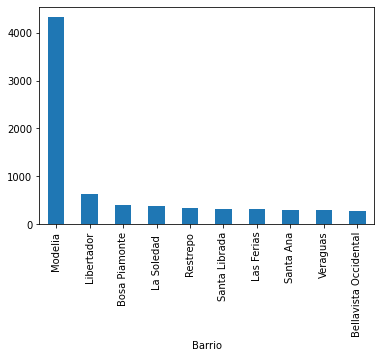

In [8]:
mean_10.plot.bar();

Podemos apreciar como la media de Area en  el Barrio de Modelia en consideramblemente más grande que los demás 

Consultar otros datos estadísticos, conteo, mediana, valores mínimo y máximo.

In [24]:
Est_adc = inmuebles.groupby('Barrio')['Area'].agg(['count','mean','median','max','min']).T
Est_adc

Tipo,Apartamento,Bodega,Casa,Edificio,Finca,Local,Lote,Oficina/Consultorio
count,7327,13,2043,22,11,38,6,60
mean,inf,1261538462461538365495531819417791292183358489...,inf,1090909091281818186107657016050906422837242361...,8538863709999999672091622072377668298429661808...,inf,7000000003466667382423613483633217080227259188...,inf
median,380000000.0,980000000.0,620000000.0,1700000000.0,2849999872.0,1325000000.0,1025000000.0,700000000.0
max,999000000,980000000,99920000,9200000000,939275008,94500000,950000000,970000000
min,100000000,120000000,1000000000,1300000000,1000000000,1200000000,1100000000,1000000000


***Clase 2***

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

In [12]:
inmuebles.Valor[0].split()
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Precio'] = valor[1]
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True)

In [13]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000

In [25]:
Est_adc = inmuebles.groupby('Tipo')['Precio_Millon'].agg(['count','mean','median','max','min']).T
Est_adc

Tipo,Apartamento,Bodega,Casa,Edificio,Finca,Local,Lote,Oficina/Consultorio
count,7327.000000,13.0,2043.000000,22.000000,11.000000,38.000000,6.000000,60.000000
mean,519.139558,908.0,827.051833,3078.227273,2410.711343,1768.486822,1263.333333,956.764117
median,380.000000,980.0,620.000000,1700.000000,2849.999872,1325.000000,1025.000000,700.000000
max,13200.000000,2800.0,8800.000000,16000.000000,5000.000000,5800.000000,2080.000000,6720.791000
min,79.000000,120.0,85.000000,700.000000,939.275008,94.500000,420.000000,60.000000


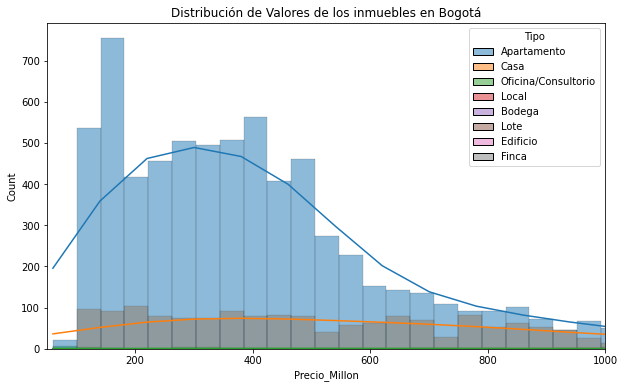

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon', kde=True, hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/precio_tipo.png',format='png')
plt.show()

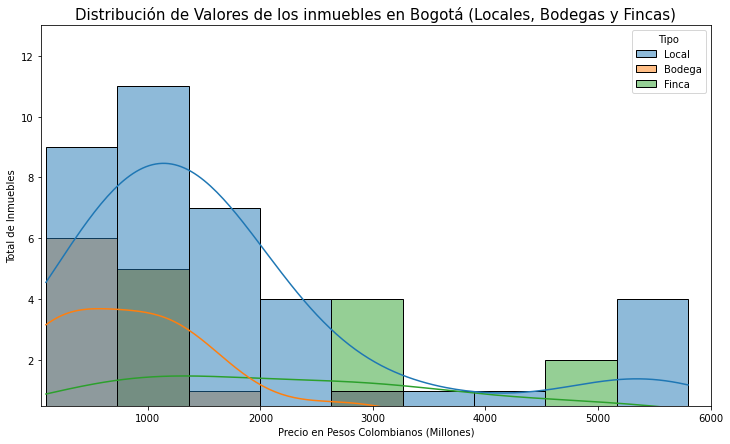

In [51]:
plt.figure(figsize=(12,7))
tres_filtrados = inmuebles.query('Tipo in ["Local", "Bodega", "Finca"]')
grafica2 = sns.histplot(data = tres_filtrados, x = 'Precio_Millon', kde = True, hue = 'Tipo')
grafica2.set_title('Distribución de Valores de los inmuebles en Bogotá (Locales, Bodegas y Fincas)', fontsize = '15')
grafica2.set_xlabel('Precio en Pesos Colombianos (Millones)')
grafica2.set_ylabel('Total de Inmuebles')
plt.ylim((.5,13))
plt.xlim((50,6000))
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/precio_3tipo.png',format='png')
plt.show()

A partir de este gráfico, podemos apreciar como el precio de los locales es mucho más alto que el de las fincas, y como hay más locales disponibles, que bodegas y fincas juntas.

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

In [101]:
inmuebles['Precio_por_metro_cuadrado'] = inmuebles['Precio_Millon'] / inmuebles['Area']
precio_por_barrio = inmuebles.groupby('Barrio')['Precio_por_metro_cuadrado'].mean().reset_index().sort_values(by = 'Precio_por_metro_cuadrado', ascending = False)
precio_por_barrio  

,Barrio,Precio_por_metro_cuadrado
49,El Virrey,10.201847
124,Santa Ana,9.364059
70,La Merced,8.976903
28,Chico Norte,8.537691
86,Los Rosales,8.173782
...,...,...
127,Santa Librada,1.951880
80,Las Ferias,1.718750
83,Libertador,1.662195
116,Roma,1.346154


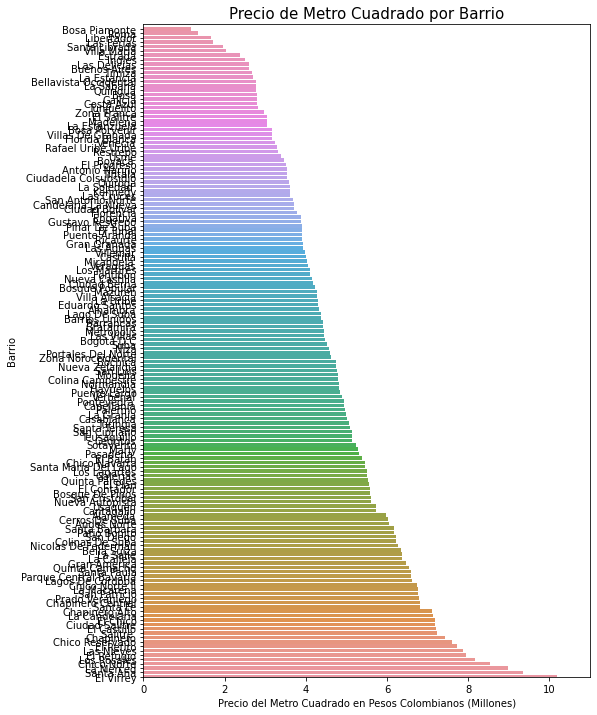

In [102]:
plt.figure(figsize=(8,12))
grafica3 = sns.barplot(data = precio_por_barrio, x ='Precio_por_metro_cuadrado', y = 'Barrio')
grafica3.set_title('Precio de Metro Cuadrado por Barrio', fontsize = '15')
plt.xlim((0,11))
plt.ylim((0,149))
grafica3.set_xlabel('Precio del Metro Cuadrado en Pesos Colombianos (Millones)')
grafica3.set_ylabel('Barrio')
plt.savefig('/content/drive/MyDrive/Colab_Notebooks/precio_m2.png',format='png')
plt.show()